In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('metadados_Dataset')

In [3]:
df

,Unnamed: 0,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Path
0,0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regular,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
1,1,HUST-Union Hospital,Patient 2,50,Male,Positive,Positive,Regular,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
2,2,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regular,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
3,3,HUST-Union Hospital,Patient 4,73,Male,Positive,Positive,Severe,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
4,4,HUST-Union Hospital,Patient 5,64,Female,Positive,Positive,Severe,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
...,...,...,...,...,...,...,...,...,...,...
752,1253,HUST-Liyuan Hospital,Patient 883,65,Female,Positive,Positive,Severe,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
753,1257,HUST-Liyuan Hospital,Patient 887,61,Male,Positive,Positive,Severe,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
754,1258,HUST-Liyuan Hospital,Patient 888,56,Female,Positive,Positive,Severe,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
755,1264,HUST-Liyuan Hospital,Patient 894,88,Male,Positive,Positive,Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...


# Quantos casos confirmados de covid temos neste dataset?

In [4]:
data = df['SARS-CoV-2 nucleic acids'].value_counts()

In [5]:
data

Positive    567
Negative    190
Name: SARS-CoV-2 nucleic acids, dtype: int64

In [6]:
eixo_x = data.index.values.tolist()

Text(0.5, 1.0, 'Quantos casos confirmados de covid temos neste dataset?')

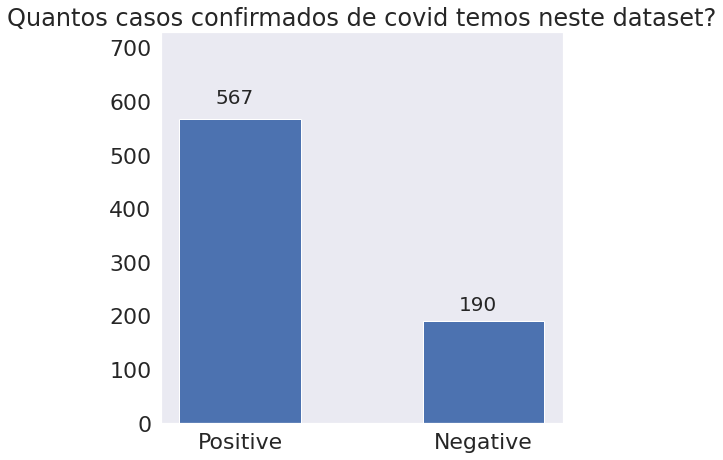

In [7]:
sns.set(font_scale=2)
sns.set_style('dark')
fig = plt.figure(figsize=(7.2,7.2))
ax = fig.add_subplot()
ax.bar(eixo_x,data.values, width=0.5)
ax.set_ylim([0,730])
ax.text(-0.1,597, '567',fontsize=20)
ax.text(0.9,210,'190',fontsize=20)
ax.set_title('Quantos casos confirmados de covid temos neste dataset?')




# Media de Idade

In [8]:
media_idade = df['Age'].mean()

In [9]:
data = df['Age'].value_counts().values

Text(0.5, 1.0, 'Histograma das Idades')

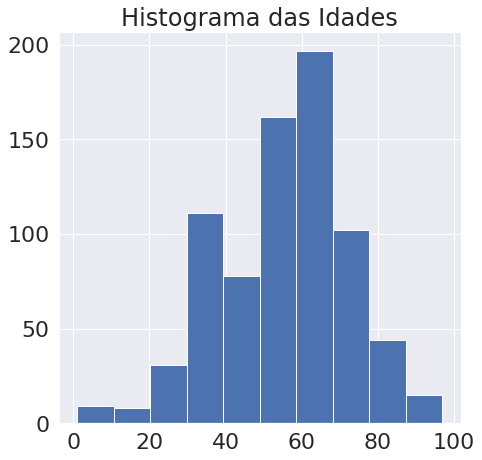

In [10]:
fig  = plt.figure(figsize=(7.2,7.2))
ax = fig.add_subplot()
df['Age'].hist(ax=ax)
ax.set_title('Histograma das Idades')


# Mortalidade por grau da covid


In [11]:
df_casos = df[['Morbidity','Mortality']]

In [12]:
df_casos.drop(df_casos[df_casos['Mortality'] == 'Unknown'].index,inplace=True)

/home/icaro/.local/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
df_casos['Morbidity'].value_counts()

Regular           317
Severe            141
Critically ill     21
Mild                6
Name: Morbidity, dtype: int64

In [14]:
df_casos['Morbidity'].unique()

array(['Regular', 'Severe', 'Mild', 'Critically ill'], dtype=object)

In [15]:
df_regular =  df_casos[df_casos['Morbidity'] == 'Regular']

In [16]:
Porcentagem_regular = df_regular['Mortality'].value_counts().apply(lambda x:(x/df_regular.shape[0])*100)

In [17]:
Porcentagem_regular

Cured    100.0
Name: Mortality, dtype: float64

In [18]:
df_severe =  df_casos[df_casos['Morbidity'] == 'Severe']

In [19]:
Porcentagem_severe = df_severe['Mortality'].value_counts().apply(lambda x:(x/df_severe.shape[0])*100)

In [20]:
df_mild =  df_casos[df_casos['Morbidity'] == 'Mild']
df_critical=  df_casos[df_casos['Morbidity'] == 'Critically ill']


In [21]:
Porcentagem_mild = df_mild['Mortality'].value_counts().apply(lambda x:(x/df_mild.shape[0])*100)

In [22]:
Porcentagem_critical = df_critical['Mortality'].value_counts().apply(lambda x:(x/df_critical.shape[0])*100)

In [23]:
Porcentagem_critical.name = 'Critico'
Porcentagem_severe.name = 'Severo'
Porcentagem_regular.name = 'Regular'
Porcentagem_mild.name = 'Suave'


In [24]:
df_analise = pd.concat([Porcentagem_critical,Porcentagem_severe,Porcentagem_regular,Porcentagem_mild],
                       axis='columns')

In [25]:
df_analise

,Critico,Severo,Regular,Suave
Deceased,61.904762,3.546099,NaN,NaN
Cured,38.095238,96.453901,100.0,100.0


In [26]:
Porcentagem_critical.index.to_list()

['Deceased', 'Cured']

In [27]:
Porcentagem_critical.values.tolist()

[61.904761904761905, 38.095238095238095]

(0.0, 100.0)

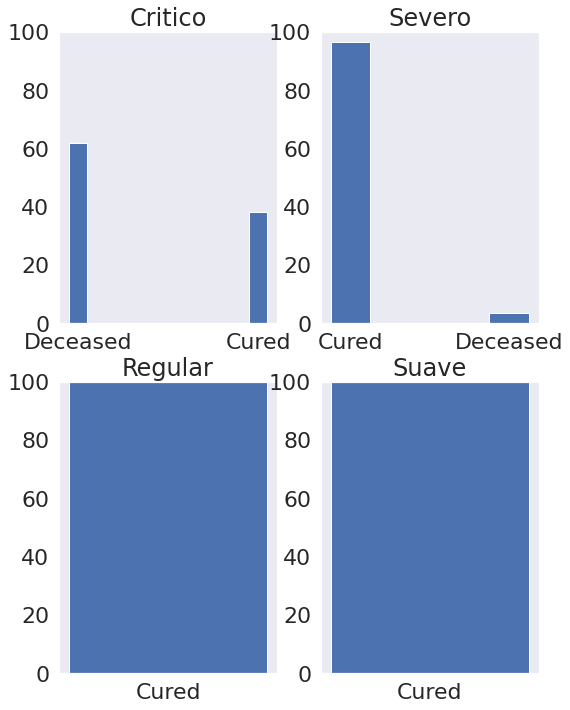

In [28]:
fig =plt.figure(figsize=(8.6,11.8))
ax = fig.add_subplot(2,2,1)
ax.bar(Porcentagem_critical.index.to_list(),Porcentagem_critical.values.tolist(),width=0.10)
ax.set_title('Critico')
ax.set_ylim([0,100])


ax2 = fig.add_subplot(2,2,2)
ax2.bar(Porcentagem_severe.index.to_list(),Porcentagem_severe.values,width=0.25,label='Severo')
ax2.set_title('Severo')
ax2.set_ylim([0,100])


ax3 = fig.add_subplot(2,2,3)
ax3.bar(Porcentagem_regular.index.to_list(),Porcentagem_regular.values,width=0.1,label='Regular')
ax3.set_title('Regular')
ax3.set_ylim([0,100])

ax4 = fig.add_subplot(2,2,4)
ax4.bar(Porcentagem_regular.index.to_list(),Porcentagem_regular.values,width=0.1,label='Suave')
ax4.set_title('Suave')
ax4.set_ylim([0,100])



In [29]:
df.replace({'Regular':'Regula/Mild', 'Severe':'Severe/Critically ill', 'Mild':'Regula/Mild', 'Critically ill':'Severe/Critically ill'},
           inplace=True)

In [30]:
df

,Unnamed: 0,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Path
0,0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
1,1,HUST-Union Hospital,Patient 2,50,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
2,2,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
3,3,HUST-Union Hospital,Patient 4,73,Male,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
4,4,HUST-Union Hospital,Patient 5,64,Female,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
...,...,...,...,...,...,...,...,...,...,...
752,1253,HUST-Liyuan Hospital,Patient 883,65,Female,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
753,1257,HUST-Liyuan Hospital,Patient 887,61,Male,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
754,1258,HUST-Liyuan Hospital,Patient 888,56,Female,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
755,1264,HUST-Liyuan Hospital,Patient 894,88,Male,Positive,Positive,Severe/Critically ill,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...


In [31]:
df.to_csv('metadados_reorganizado')